# 순환 신경망 (Recurrent Neural Network, RNN)

- **순서가 있는 데이터**를 입력으로 받음

- 변화하는 입력에 대한 출력을 얻음

- 시계열(날씨, 주가 등), 자연어와 같이 **시간의 흐름에 따라 변화하고, 그 변화가 의미를 갖는 데이터** 

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망

  - 입력 → 은닉 → 출력층 으로 이어지는 단방향 구조

  - 이전 스텝의 출력의 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조

  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  

  - 현재 상태가 이전 상태에 종속

  <br>

  <img src="https://www.researchgate.net/profile/Engin_Pekel/publication/315111480/figure/fig1/AS:472548166115333@1489675670530/Feed-forward-and-recurrent-ANN-architecture.png">

  <sub>출처: https://www.researchgate.net/figure/Feed-forward-and-recurrent-ANN-architecture_fig1_315111480</sub>



## 순환 신경망 구조

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" width="700">

<br>

- 입력 $x_t$에서 $t$는 시각을 뜻함

- $X_0$에 대한 출력 $Y_0$이 다음 레이어에 전달

- 각각의 입력에 대해 출력은 해당 레이어대로 출력값을 반환

## 순환 신경망의 다양한 구조

<img src="https://static.packt-cdn.com/products/9781789346640/graphics/2d4a64ef-9cf9-4b4a-9049-cb9de7a07f89.png">
  
  <sub>출처: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789346640/11/ch11lvl1sec80/introduction</sub>

- one to one
  - RNN

- one to many
  - Image Captioning 

  - 이미지에 대한 설명 생성

- many to one
  - Sentiment Classification

  - 문장의 긍정/부정을 판단하는 감정 분석

- many to many
  - Machine Translation

  - 하나의 언어를 다른 언어로 번역하는 기계 번역

- many to many
  - Video Classification(Frame Level)




## 두 가지 정보(현재 입력, 이전 시각의 출력)을 처리하는 수식
$\qquad h_t = tanh ( \ h_{t-1} W_h \ + \ x_t W_x + b) $

- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치

- $W_h$ : 다음 시각의 출력으로 변환하기 위한 가중치

- $h$는 '상태'를 기억

- $h_t \ $를 은닉 상태(hidden state) 또는 은닉 상태 벡터(hidden state vector)라고도 불림

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [1]:
import numpy as np

In [3]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features, ))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [4]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

In [5]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [7]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 40,320
Trainable params: 40,320
Non-trainable params: 0
_________________________________________________________________


## IMDB 데이터 적용

### 데이터 로드

In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [9]:
num_words = 10000
max_len = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print(input_train.shape)
print(input_test.shape)

17465344/17464789 [==============================] - 0s 0us/step
25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [10]:
from tensorflow.keras.layers import Dense

In [12]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [13]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 51s 324ms/step - loss: 0.5992 - acc: 0.6603 - val_loss: 0.4691 - val_acc: 0.7964
Epoch 2/10
157/157 [==============================] - 50s 321ms/step - loss: 0.3899 - acc: 0.8332 - val_loss: 0.3989 - val_acc: 0.8266
Epoch 3/10
157/157 [==============================] - 51s 328ms/step - loss: 0.2935 - acc: 0.8831 - val_loss: 0.3883 - val_acc: 0.8360
Epoch 4/10
157/157 [==============================] - 51s 324ms/step - loss: 0.2415 - acc: 0.9034 - val_loss: 0.3684 - val_acc: 0.8544
Epoch 5/10
157/157 [==============================] - 51s 325ms/step - loss: 0.1818 - acc: 0.9309 - val_loss: 0.3530 - val_acc: 0.8710
Epoch 6/10
157/157 [==============================] - 51s 327ms/step - loss: 0.1321 - acc: 0.9534 - val_loss: 0.4064 - val_acc: 0.8654
Epoch 7/10
157/157 [==============================] - 50s 316ms/step - loss: 0.0938 - acc: 0.9670 - val_loss: 0.6493 - val_acc: 0.7480
Epoch 8/10
157/157 [==============================] - 5

### 시각화

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

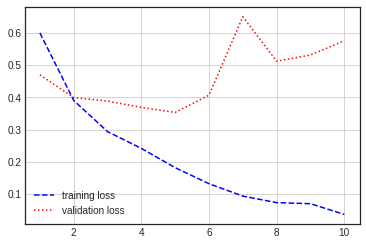

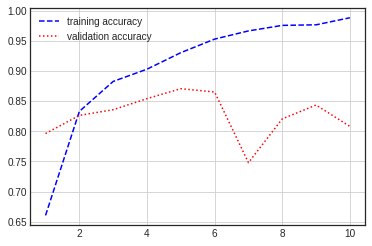

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

In [16]:
model.evaluate(input_test, y_test)

782/782 [==============================] - 26s 34ms/step - loss: 0.5685 - acc: 0.8144


[0.5685151815414429, 0.8144000172615051]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



# LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## IMDB 데이터

### 데이터 로드

In [17]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
num_words = 10000
max_len = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen=max_len)
pad_x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Embedding

In [20]:
model = Sequential()

model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [21]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 5s 29ms/step - loss: 0.5281 - acc: 0.7546 - val_loss: 0.4775 - val_acc: 0.7680
Epoch 2/10
157/157 [==============================] - 4s 26ms/step - loss: 0.3162 - acc: 0.8756 - val_loss: 0.3305 - val_acc: 0.8690
Epoch 3/10
157/157 [==============================] - 4s 27ms/step - loss: 0.2436 - acc: 0.9071 - val_loss: 0.3134 - val_acc: 0.8664
Epoch 4/10
157/157 [==============================] - 4s 28ms/step - loss: 0.2063 - acc: 0.9233 - val_loss: 0.3845 - val_acc: 0.8778
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1817 - acc: 0.9328 - val_loss: 0.3860 - val_acc: 0.8694
Epoch 6/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1582 - acc: 0.9431 - val_loss: 0.4171 - val_acc: 0.8652
Epoch 7/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1401 - acc: 0.9506 - val_loss: 0.3249 - val_acc: 0.8808
Epoch 8/10
157/157 [==============================] - 4s 27ms/step - 

### 시각화

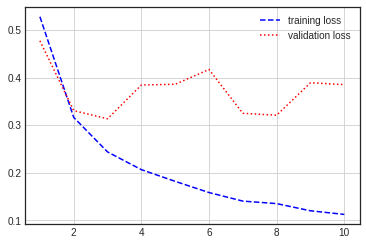

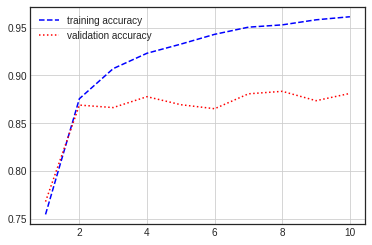

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

### 모델 평가

In [23]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 7s 9ms/step - loss: 0.4255 - acc: 0.8649


[0.4254775047302246, 0.8649200201034546]

# GRU (Gated Recurrent Unit)
- LSTM을 더 단순하게 만든 구조

- 기억 셀은 없고, 시간방향으로 전파하는 것은 은닉 상태만 있음

- reset gate
  - 과거의 은닉 상태를 얼마나 무시할지 결정

  - $r$ 값이 결정

- update gate
  -  은닉 상태를 갱신하는 게이트  

  - LSTM의 forget, input gate 역할을 동시에 함
  
  <img src="https://miro.medium.com/max/1400/1*jhi5uOm9PvZfmxvfaCektw.png" width="500">

<sub>출처: https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21</sub>

  ### $\qquad z = \sigma (x_t W^{(z)}_x + h_{t-1} W^{(z)}_h + b^{(z)} \\ 
  \qquad r = \sigma (x_t W^{(r)}_x + h_{t-1} W^{(r)}_h + b^{(r)}) \\
  \qquad \tilde{i} = tanh (x_t W^{(i)}_x + (r \odot h_{t-1}) W^{(i)}_h + b ) \\
  \qquad h_t = (1 - z) \odot h_{t-1} + z \odot \tilde{h}$


## Reuters 데이터

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋 
  - 다중 분류 문제


### 데이터셋 로드

In [24]:
from tensorflow.keras.datasets import reuters

In [25]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

2113536/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


### 데이터 전처리 및 확인

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [27]:
max_len = 300

In [28]:
pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

print(len(pad_x_train[0]))

300


In [29]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding

In [31]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=256))
model.add(GRU(256, return_sequences=True))
model.add(GRU(128))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 256)         2560000   
_________________________________________________________________
gru (GRU)                    (None, None, 256)         394752    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
dense_3 (Dense)              (None, 46)                5934      
Total params: 3,108,910
Trainable params: 3,108,910
Non-trainable params: 0
_________________________________________________________________


### 모델 학습

In [32]:
history = model.fit(pad_x_train, y_train,
                    batch_size=32, epochs=20,
                    validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 14s 61ms/step - loss: 1.9686 - acc: 0.4953 - val_loss: 1.6668 - val_acc: 0.5671
Epoch 2/20
225/225 [==============================] - 13s 58ms/step - loss: 1.5293 - acc: 0.6090 - val_loss: 1.4997 - val_acc: 0.6171
Epoch 3/20
225/225 [==============================] - 13s 58ms/step - loss: 1.2370 - acc: 0.6866 - val_loss: 1.2953 - val_acc: 0.6867
Epoch 4/20
225/225 [==============================] - 13s 58ms/step - loss: 0.9314 - acc: 0.7584 - val_loss: 1.2979 - val_acc: 0.7012
Epoch 5/20
225/225 [==============================] - 13s 58ms/step - loss: 0.6924 - acc: 0.8191 - val_loss: 1.2682 - val_acc: 0.7201
Epoch 6/20
225/225 [==============================] - 13s 57ms/step - loss: 0.5282 - acc: 0.8672 - val_loss: 1.2512 - val_acc: 0.7240
Epoch 7/20
225/225 [==============================] - 13s 57ms/step - loss: 0.4035 - acc: 0.8971 - val_loss: 1.3358 - val_acc: 0.7168
Epoch 8/20
225/225 [==============================] - 13s 57ms

### 시각화

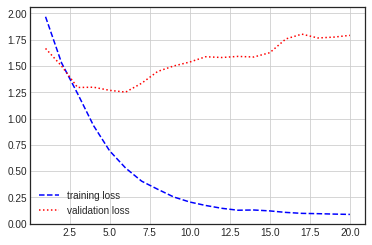

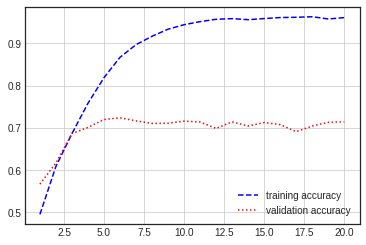

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b--', label='training loss')
plt.plot(epochs, val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(epochs, acc, 'b--', label='training accuracy')
plt.plot(epochs, val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

### 모델 평가


In [34]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 1s 15ms/step - loss: 1.9830 - acc: 0.6972


[1.9830251932144165, 0.6972395181655884]